In [545]:
###########################################################################################################
##                     	       CNN Model Training and evaluation                                         ##          
###########################################################################################################

#************************************ Step1: Import required libraries *************************************************
# Pandas library for data manipulation and analysis
import pandas as pd  
# NumPy library for numerical operations and array handling.
import numpy as np   
# Matplotlib library for creating visualizations and plots.
import matplotlib.pyplot as plt 
# Module for various activation functions.
from tensorflow.keras import activations  
from keras.utils import to_categorical 
# Utility to convert labels to one-hot encoded vectors.
from keras.utils import to_categorical 
# Sequential model for building neural networks.
from keras.models import Sequential 
 # Classes for cross-validation strategies.
from sklearn.model_selection import KFold, StratifiedKFold 
from keras.layers import (
    Dense, Dropout, Flatten, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
)  # Layers for constructing neural networks.
from keras import backend as K  # Provides low-level operations for Keras backend.
from keras.layers import BatchNormalization  # Layer for batch normalization in neural networks.
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets.
# Functions for various evaluation metrics and reporting.
from sklearn.metrics import (matthews_corrcoef, auc, roc_curve, classification_report, confusion_matrix,
average_precision_score, precision_recall_curve
)  
# Callback for saving model checkpoints during training.
from keras.callbacks import ModelCheckpoint  
# Utility function for resampling imbalanced datasets.
from sklearn.utils import resample  

############################# Step2: load metrics function #####################
### F1 score, precision, recall and accuracy metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [5]:
# ! pip install tensorflow

In [1058]:
df=pd.read_csv("chisquare_training_features_final_undersampled_400.csv")
df

,Isolation source,category,BioSample,sra_accession,country,305245,2027584,3906518,4027906,4552348,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,feces swine,swine,SAMN03576991,SRR2847938,kenya,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
1,chicken carcass,poultry,SAMN03577271,SRR3115981,ethipia,4.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0
2,feces swine,swine,SAMN03577149,SRR3134909,ethipia,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
3,pig stool,swine,SAMN07135217,SRR6951172,nigeria,4.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
4,poultry,poultry,SAMN06240034,SRR5232014,uganda,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,feces poultry,poultry,SAMN03577373,SRR6411078,ethipia,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,chicken,poultry,SAMN02368606,SRR1106456,nigeria,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,pig stool,swine,SAMN07135265,SRR6950720,nigeria,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
710,feces swine,swine,SAMN03577204,SRR3088941,ethipia,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0


In [1062]:
df_under=pd.read_csv("chisquare_training_features_final_undersampled_400.csv")
df_under

,Isolation source,category,BioSample,sra_accession,country,305245,2027584,3906518,4027906,4552348,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,feces swine,swine,SAMN03576991,SRR2847938,kenya,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
1,chicken carcass,poultry,SAMN03577271,SRR3115981,ethipia,4.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0
2,feces swine,swine,SAMN03577149,SRR3134909,ethipia,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
3,pig stool,swine,SAMN07135217,SRR6951172,nigeria,4.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
4,poultry,poultry,SAMN06240034,SRR5232014,uganda,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,feces poultry,poultry,SAMN03577373,SRR6411078,ethipia,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,chicken,poultry,SAMN02368606,SRR1106456,nigeria,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,pig stool,swine,SAMN07135265,SRR6950720,nigeria,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
710,feces swine,swine,SAMN03577204,SRR3088941,ethipia,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0


In [1063]:
# df.to_csv("updated_merged_training_data.csv")
X=df_under.drop(columns=["category","BioSample","sra_accession","country","Isolation source"])
y=df["category"]
y
from sklearn.preprocessing import LabelEncoder
# Assuming you have a DataFrame named df with a "category" column
# Extract the "category" column as a pandas Series
y = df["category"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the extracted Series
encoded_labels = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X.values, encoded_labels, test_size=0.2, random_state=42)
y
# encoded_labels

0        swine
1      poultry
2        swine
3        swine
4      poultry
        ...   
707    poultry
708    poultry
709      swine
710      swine
711    poultry
Name: category, Length: 712, dtype: object

In [1067]:
X

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
1,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0
2,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
3,4.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
710,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0


In [1068]:
# categories=["bovine","poultry","swine"]
# df=df[df["category"].isin(categories)]
# df=df_under.drop(columns=["Unnamed: 0"])

In [1069]:
df

,Isolation source,category,BioSample,sra_accession,country,305245,2027584,3906518,4027906,4552348,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,feces swine,swine,SAMN03576991,SRR2847938,kenya,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
1,chicken carcass,poultry,SAMN03577271,SRR3115981,ethipia,4.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0
2,feces swine,swine,SAMN03577149,SRR3134909,ethipia,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
3,pig stool,swine,SAMN07135217,SRR6951172,nigeria,4.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
4,poultry,poultry,SAMN06240034,SRR5232014,uganda,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,feces poultry,poultry,SAMN03577373,SRR6411078,ethipia,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,chicken,poultry,SAMN02368606,SRR1106456,nigeria,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,pig stool,swine,SAMN07135265,SRR6950720,nigeria,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
710,feces swine,swine,SAMN03577204,SRR3088941,ethipia,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0


In [1070]:
# Test data
df_uganda=pd.read_csv("uganda_test_data.csv",low_memory=False)
# df_tz=pd.read_csv("tanzania_test_data.csv")
# df_test=pd.concat(df_ugands,df_tz)
df_uganda

KeyboardInterrupt: 

In [ ]:
# Df Ethiopia
df_ethiopia=pd.read_csv("ethiopia_test_data.csv",low_memory=False)
df_ethiopia

In [ ]:
dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']


In [ ]:
# df_tz=pd.read_csv("tanzania_test_data.csv")
# # 

In [1071]:
# Drop unnecessary columns
training_columns = X.columns.tolist()
#Reorder the columns in the test data to match the training data
test_data = df_uganda[training_columns]
test_data
#Check for missing columns in test data and add them with zeros
missing_columns = set(training_columns) - set(test_data.columns)
for column in missing_columns:
    test_data[column] = 0

# Now, test_data has the same columns in the same order as training_data
# Any missing columns are added with values set to 0
ug_test=test_data.fillna(0)
ug_test
test_data_tz = df_tz[training_columns]
test_data_tz
tz_test=test_data_tz.fillna(0)
tz_test

test_data_ethiopia = df_ethiopia[training_columns]
test_data_ethiopia
test_data_ethiopia=test_data_ethiopia.fillna(0)
test_data_ethiopia

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,N,N,C,N,N,N,C,C,N,N,...,N,C,C,N,C,N,N,C,N,C
1,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
2,N,N,C,N,N,N,C,C,N,N,...,N,C,C,N,C,N,N,C,N,C
3,C,N,N,C,C,C,N,N,C,N,...,N,N,C,N,N,C,C,N,C,N
4,C,C,C,C,C,C,N,C,C,C,...,C,N,N,N,N,N,C,C,N,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,C,C,N,C,N,C,C,N,C,N,...,C,C,C,C,C,N,N,C,N,C
65,N,N,C,N,N,N,C,C,N,N,...,N,C,C,N,C,N,N,C,N,C
66,C,C,C,C,C,C,C,C,C,C,...,N,N,N,N,C,C,C,C,C,A
67,C,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,N,C


In [1072]:
df_tz=df=df_tz.drop(columns=["Unnamed: 0","Unnamed: 0"])
df_tz

KeyError: "['Unnamed: 0', 'Unnamed: 0'] not found in axis"

In [1073]:
# Process the test data
def label_encoding_dim_category_reduction(df_in,country):
    # Print the processing status with the DataFrame name
    print("Processing DataFrame:", country)
    # Create a custom label encoding map
    custom_encoding_map = {'N': 0, 'A': 1, 'T': 2, 'G': 3, 'C': 4}
#     dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
#     snp_data = df_in.drop(columns=dropped_columns)
    # Apply custom label encoding to categorical columns
    categorical_cols = df_in.select_dtypes(include=['object']).columns
    df_in[categorical_cols] = df_in[categorical_cols].apply(lambda col: col.map(custom_encoding_map))

    # Combine non-categorical variables with informative SNP columns
#     data_combined = pd.concat([category_data[dropped_columns], df_filtered], axis=1)
    return df_in



# # Load your DataFrame here
# # df = pd.read_csv("your_data.csv")
# # Specify the name of the category column
# category_column_name = "CategoryName"
# label_encoding_dim_category_reduction(df, category_column_name)

In [1074]:
test_data_ug1=label_encoding_dim_category_reduction(ug_test,"uganda")
test_data_ug1

Processing DataFrame: uganda


,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,4,0,0,0,4,4,4,0,4,0,...,4,0,0,0,4,0,0,4,4,4
1,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,4,4,4,4,4,1
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,0,4
3,0,0,4,0,0,0,0,0,0,4,...,4,4,0,4,0,4,0,0,0,4
4,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,4,4,4,4,4,1
5,4,0,0,0,4,4,4,0,4,0,...,4,0,0,0,4,0,0,4,4,4
6,0,0,4,0,0,0,0,0,0,4,...,4,4,0,4,0,4,0,0,0,4
7,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,4,4,4,4,4,1
8,4,4,0,4,0,4,4,0,0,4,...,4,4,4,4,0,0,4,4,4,0
9,4,0,0,0,4,4,4,0,4,0,...,4,0,0,0,4,0,0,4,4,4


In [1075]:
test_data_tz=label_encoding_dim_category_reduction(tz_test,"tanzania")
test_data_tz

Processing DataFrame: tanzania


,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,4.0,1.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,1.0
2,4.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
3,4.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
5,4.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
6,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,0.0,...,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,1.0
7,4.0,0.0,4.0,4.0,4.0,0.0,4.0,0.0,4.0,4.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
8,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,...,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0
9,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,...,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0


In [1076]:
test_data_ethiopia=label_encoding_dim_category_reduction(test_data_ethiopia,"ethiopia")
test_data_ethiopia

Processing DataFrame: ethiopia


,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,0,0,4,0,0,0,4,4,0,0,...,0,4,4,0,4,0,0,4,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,4,0,0,0,4,4,0,0,...,0,4,4,0,4,0,0,4,0,4
3,4,0,0,4,4,4,0,0,4,0,...,0,0,4,0,0,4,4,0,4,0
4,4,4,4,4,4,4,0,4,4,4,...,4,0,0,0,0,0,4,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,4,0,4,0,4,4,0,4,0,...,4,4,4,4,4,0,0,4,0,4
65,0,0,4,0,0,0,4,4,0,0,...,0,4,4,0,4,0,0,4,0,4
66,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,4,4,4,4,4,1
67,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,0,4


In [1077]:
test_data_tz

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,4.0,1.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,1.0
2,4.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
3,4.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
5,4.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
6,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,0.0,...,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,1.0
7,4.0,0.0,4.0,4.0,4.0,0.0,4.0,0.0,4.0,4.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
8,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,...,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0
9,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,...,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0


In [1078]:
y_uganda=df_uganda[dropped_columns]
y_uganda

,Isolation source,category,BioSample,sra_accession,country
0,poultry,poultry,SAMN06240015,SRR5251507,uganda
1,poultry,poultry,SAMN06240023,SRR5232008,uganda
2,poultry,poultry,SAMN06238270,SRR5280386,uganda
3,poultry,poultry,SAMN06240082,SRR5278815,uganda
4,poultry,poultry,SAMN06240024,SRR5232016,uganda
5,poultry,poultry,SAMN06240016,SRR5251249,uganda
6,poultry,poultry,SAMN06240083,SRR5278833,uganda
7,poultry,poultry,SAMN06240022,SRR5232023,uganda
8,poultry,poultry,SAMN06238272,SRR5278810,uganda
9,poultry,poultry,SAMN06240014,SRR5251419,uganda


In [1079]:
y_eth=df_ethiopia[dropped_columns]
y_eth

,Isolation source,category,BioSample,sra_accession,country
0,feces poultry,poultry,SAMN03577372,SRR6411063,ethipia
1,feces (Bos taurus),bovine,SAMN03577292,SRR3088917,ethipia
2,feces poultry,poultry,SAMN03577376,SRR6411032,ethipia
3,bovine minced meat,bovine,SAMN03577267,SRR3115967,ethipia
4,feces (Bos taurus),bovine,SAMN03577283,SRR3115972,ethipia
...,...,...,...,...,...
64,feces swine,swine,SAMN03577208,SRR3088928,ethipia
65,feces poultry,poultry,SAMN03577382,SRR6690672,ethipia
66,swine lymph node,swine,SAMN03577094,SRR3027711,ethipia
67,feces swine,swine,SAMN03577221,SRR3088932,ethipia


In [1080]:
test_data_ug=pd.concat([y_uganda,test_data_ug1],axis=1)
test_data_ug
# y_uganda
test_data_eth=pd.concat([y_eth,test_data_ethiopia],axis=1)
data_combined = pd.concat([test_data_ug, test_data_eth])
data_combined.to_csv("test_data_ethiopia_uganda.csv")

In [1081]:
y_ug=df_uganda["category"]
y_tz=df_tz["category"]
y_tz
y_ethiopia=df_ethiopia["category"]
y_ethiopia

0     poultry
1      bovine
2     poultry
3      bovine
4      bovine
       ...   
64      swine
65    poultry
66      swine
67      swine
68    poultry
Name: category, Length: 69, dtype: object

In [1082]:
# df.to_csv("updated_merged_training_data.csv")

In [1083]:
X

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
1,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0
2,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
3,4.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
710,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0


In [1084]:
X_filtered

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4554083,842668,44836,1239006,1922047,2211095,2212974,3051143,2181910,4089957
0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.0,4.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0
3,4.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,...,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0
710,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0


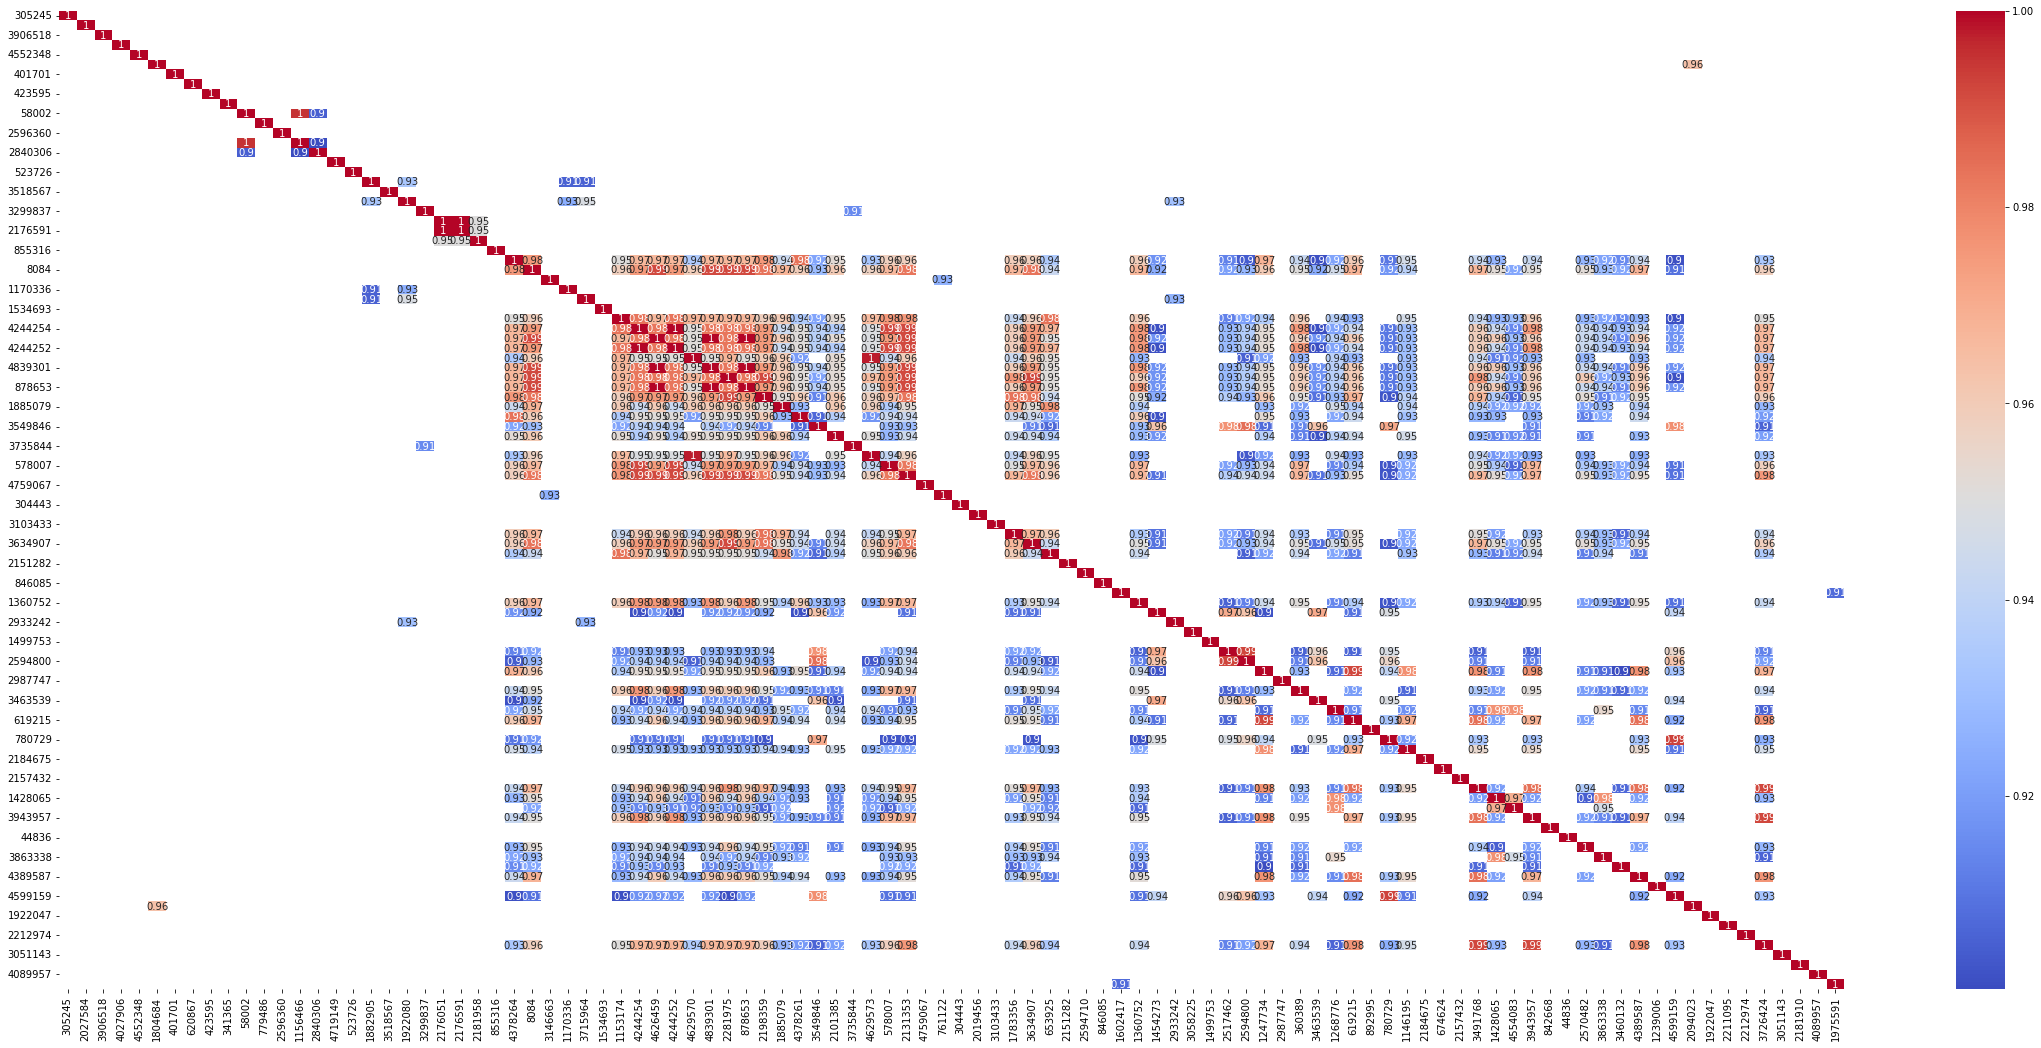

In [1022]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a mask to identify pairs with correlation > 0.9
mask = np.abs(correlation_matrix) > 0.9

# Set the size of the figure
plt.figure(figsize=(40, 18))  # Adjust the width (10) and height (8) as needed

# Create the heatmap using the mask
sns.heatmap(correlation_matrix[mask], annot=True, cmap='coolwarm')
plt.show()


In [1023]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a mask to identify pairs with correlation > 0.9
mask = np.abs(correlation_matrix) > 0.9

# Get the indices of the correlated pairs
correlated_pairs = np.argwhere(mask)

# Create a set to store the indices of features to drop
indices_to_drop = set()

# Iterate through correlated pairs and drop one feature from each pair
for i, j in correlated_pairs:
    if i != j and i not in indices_to_drop and j not in indices_to_drop:
        # Drop feature j (you can choose i if you prefer)
        indices_to_drop.add(j)

# Drop the identified features by their indices
X_filtered = X.drop(X.columns[list(indices_to_drop)], axis=1)

# Print the names of the dropped features
dropped_feature_names = [X.columns[i] for i in indices_to_drop]
print("Dropped Features:", dropped_feature_names)
X_filtered

Dropped Features: ['1156466', '2840306', '1922080', '2176591', '2181958', '8084', '1170336', '3715964', '1153174', '4244254', '4626459', '4244252', '4629570', '4839301', '2281975', '878653', '2198359', '1885079', '4378261', '3549846', '2101385', '3735844', '4629573', '578007', '2131353', '761122', '1783356', '3634907', '653925', '1360752', '1454273', '2517462', '2594800', '1247734', '360389', '3463539', '1268776', '619215', '780729', '1146195', '3491768', '1428065', '3943957', '2570482', '3863338', '3460132', '4389587', '4599159', '2094023', '3726424', '1975591']


,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4554083,842668,44836,1239006,1922047,2211095,2212974,3051143,2181910,4089957
0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.0,4.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0
3,4.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,...,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0
710,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0


In [1024]:
X_filtered.to_csv("final_features_final_without_correlated_features_removed.csv")

In [1025]:
# # Create a bar plot for the top features
# top_features = pd.DataFrame(top_features)
# plt.figure(figsize=(18, 8))
# plt.bar(top_features['Feature'], top_features['Score'])
# plt.xlabel('Feature Names')
# plt.ylabel('Scores')
# plt.title('Top 100 Features by Chi-squared Score (Unique SNPs)')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.tight_layout()

# # Show the plot
# plt.show()
# plt.savefig("final_features_chsquare.png")

In [1026]:
correlation_matrix

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4599159,2094023,1922047,2211095,2212974,3726424,3051143,2181910,4089957,1975591
305245,1.000000,0.803895,-0.178577,0.800160,0.817951,-0.212779,0.727102,0.777003,0.694711,-0.270443,...,-0.113035,-0.222906,0.610412,0.640298,-0.141760,-0.167828,-0.325539,0.194126,0.655590,0.729160
2027584,0.803895,1.000000,-0.249569,0.892393,0.835919,-0.229949,0.725712,0.764072,0.667121,-0.260580,...,-0.201823,-0.231313,0.656939,0.624505,-0.222084,-0.188170,-0.326977,0.238453,0.726681,0.689951
3906518,-0.178577,-0.249569,1.000000,-0.221821,-0.182932,0.826114,-0.213334,-0.215807,-0.230138,0.749787,...,0.796101,0.832236,-0.196249,-0.229165,-0.045660,0.753979,0.653880,0.597915,-0.182721,-0.071423
4027906,0.800160,0.892393,-0.221821,1.000000,0.809401,-0.185046,0.667749,0.732073,0.654598,-0.259523,...,-0.169679,-0.195429,0.612746,0.608483,-0.192088,-0.154269,-0.303026,0.248247,0.737606,0.708897
4552348,0.817951,0.835919,-0.182932,0.809401,1.000000,-0.208296,0.685305,0.728190,0.616805,-0.256349,...,-0.125165,-0.218535,0.581839,0.593291,-0.150340,-0.185382,-0.322133,0.232497,0.643182,0.669386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726424,-0.167828,-0.188170,0.753979,-0.154269,-0.185382,0.734338,-0.229100,-0.207753,-0.173519,0.641506,...,0.932351,0.727642,-0.134266,-0.233068,-0.079170,1.000000,0.575483,0.533144,-0.131119,-0.127151
3051143,-0.325539,-0.326977,0.653880,-0.303026,-0.322133,0.631493,-0.237646,-0.194616,-0.254163,0.762835,...,0.542557,0.627269,-0.270212,-0.429296,-0.163466,0.575483,1.000000,0.402140,-0.265100,-0.250494
2181910,0.194126,0.238453,0.597915,0.248247,0.232497,0.629652,0.080236,0.128646,0.265442,0.522858,...,0.491416,0.598913,0.296622,0.030674,-0.216326,0.533144,0.402140,1.000000,0.315329,0.304872
4089957,0.655590,0.726681,-0.182721,0.737606,0.643182,-0.086361,0.522572,0.582137,0.769807,-0.218649,...,-0.145127,-0.069787,0.389463,0.479479,-0.165425,-0.131119,-0.265100,0.315329,1.000000,0.842008


In [283]:
# One-hot encode the target variable y
# y_encoded = pd.get_dummies(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, encoded_labels, test_size=0.2, random_state=42,stratify=encoded_labels)


In [281]:
inputs = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
inputs = inputs.astype('float32')
targets = to_categorical(y_train)
inputs.shape,targets.shape

X_test2 = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_test2 = X_test2.astype('float32')
y_test2 = to_categorical(y_test)
X_test2.shape,y_test2.shape

############################# Model training #####################
batch_size = 8
no_classes = 4
no_epochs = 50
verbosity = 1
num_folds = 2

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
model_history=[]
for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=3,activation='relu', input_shape=(X_test.shape[1],1)))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
    #model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
    #model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,activation='softmax'))
    # Model compilation
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])
    # Generate a print
    print('--------------------------------')
    print(f'Training for fold {fold_no} ...')
    ## checkpoint for saving model
    filepath="Train_CNN_weights.best.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_f1_m', verbose=1, save_best_only=True,mode='max')
    callbacks_list = [checkpoint]
    # Fit data to model
    train_model = model.fit(inputs[train], targets[train],batch_size=batch_size,epochs=no_epochs,callbacks=callbacks_list,verbose=verbosity,validation_data=(inputs[test], targets[test]))
    model_history.append(train_model.history)
    # Increase fold number
    fold_no = fold_no + 1


--------------------------------
Training for fold 1 ...
Epoch 1/50
33/36 [==========================>...] - ETA: 0s - loss: 0.5032 - acc: 0.8409 - f1_m: 0.8159 - precision_m: 0.8934 - recall_m: 0.7765
Epoch 1: val_f1_m improved from -inf to 0.00000, saving model to Train_CNN_weights.best.hdf5
36/36 [==============================] - 3s 23ms/step - loss: 0.4821 - acc: 0.8451 - f1_m: 0.8243 - precision_m: 0.8954 - recall_m: 0.7882 - val_loss: 1.1514 - val_acc: 0.9228 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
16/36 [============>.................] - ETA: 0s - loss: 0.1572 - acc: 0.9375 - f1_m: 0.9337 - precision_m: 0.9766 - recall_m: 0.8984

/home/jupyter-onyangob/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/36 [========================>.....] - ETA: 0s - loss: 0.1513 - acc: 0.9435 - f1_m: 0.9392 - precision_m: 0.9798 - recall_m: 0.9073
Epoch 2: val_f1_m did not improve from 0.00000
36/36 [==============================] - 0s 11ms/step - loss: 0.1477 - acc: 0.9437 - f1_m: 0.9407 - precision_m: 0.9757 - recall_m: 0.9132 - val_loss: 0.9764 - val_acc: 0.9333 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
30/36 [========================>.....] - ETA: 0s - loss: 0.1305 - acc: 0.9625 - f1_m: 0.9455 - precision_m: 0.9730 - recall_m: 0.9250
Epoch 3: val_f1_m improved from 0.00000 to 0.57214, saving model to Train_CNN_weights.best.hdf5
36/36 [==============================] - 0s 10ms/step - loss: 0.1282 - acc: 0.9613 - f1_m: 0.9476 - precision_m: 0.9706 - recall_m: 0.9306 - val_loss: 0.7847 - val_acc: 0.9333 - val_f1_m: 0.5721 - val_precision_m: 0.9444 - val_recall_m: 0.4347
Epoch 4/50
27/36 [=====================>........] - ETA: 0s - loss: 0.1270 - a

Epoch 20/50
33/36 [==========================>...] - ETA: 0s - loss: 0.1041 - acc: 0.9583 - f1_m: 0.9532 - precision_m: 0.9654 - recall_m: 0.9432
Epoch 20: val_f1_m did not improve from 0.96343
36/36 [==============================] - 0s 8ms/step - loss: 0.0993 - acc: 0.9613 - f1_m: 0.9553 - precision_m: 0.9683 - recall_m: 0.9444 - val_loss: 0.1106 - val_acc: 0.9614 - val_f1_m: 0.9634 - val_precision_m: 0.9653 - val_recall_m: 0.9618
Epoch 21/50
35/36 [============================>.] - ETA: 0s - loss: 0.1084 - acc: 0.9607 - f1_m: 0.9621 - precision_m: 0.9679 - recall_m: 0.9571  
Epoch 21: val_f1_m did not improve from 0.96343
36/36 [==============================] - 0s 8ms/step - loss: 0.1069 - acc: 0.9613 - f1_m: 0.9632 - precision_m: 0.9688 - recall_m: 0.9583 - val_loss: 0.1108 - val_acc: 0.9614 - val_f1_m: 0.9510 - val_precision_m: 1.0000 - val_recall_m: 0.9132
Epoch 22/50
36/36 [==============================] - ETA: 0s - loss: 0.1007 - acc: 0.9613 - f1_m: 0.9560 - precision_m: 0.96

Epoch 39/50
35/36 [============================>.] - ETA: 0s - loss: 0.1003 - acc: 0.9607 - f1_m: 0.9555 - precision_m: 0.9959 - recall_m: 0.9250
Epoch 39: val_f1_m did not improve from 0.96343
36/36 [==============================] - 0s 8ms/step - loss: 0.0989 - acc: 0.9613 - f1_m: 0.9568 - precision_m: 0.9960 - recall_m: 0.9271 - val_loss: 0.1065 - val_acc: 0.9614 - val_f1_m: 0.9634 - val_precision_m: 0.9653 - val_recall_m: 0.9618
Epoch 40/50
27/36 [=====================>........] - ETA: 0s - loss: 0.0959 - acc: 0.9630 - f1_m: 0.9630 - precision_m: 0.9630 - recall_m: 0.9630
Epoch 40: val_f1_m did not improve from 0.96343
36/36 [==============================] - 0s 10ms/step - loss: 0.0974 - acc: 0.9613 - f1_m: 0.9618 - precision_m: 0.9618 - recall_m: 0.9618 - val_loss: 0.1065 - val_acc: 0.9614 - val_f1_m: 0.9618 - val_precision_m: 0.9618 - val_recall_m: 0.9618
Epoch 41/50
32/36 [=========================>....] - ETA: 0s - loss: 0.0850 - acc: 0.9648 - f1_m: 0.9593 - precision_m: 0.971

36/36 [==============================] - 0s 7ms/step - loss: 0.0992 - acc: 0.9649 - f1_m: 0.9520 - precision_m: 0.9896 - recall_m: 0.9201 - val_loss: 0.1375 - val_acc: 0.9507 - val_f1_m: 0.9367 - val_precision_m: 0.9879 - val_recall_m: 0.8958
Epoch 26/50
27/36 [=====================>........] - ETA: 0s - loss: 0.1052 - acc: 0.9583 - f1_m: 0.9582 - precision_m: 0.9861 - recall_m: 0.9352   
Epoch 26: val_f1_m did not improve from 0.95139
36/36 [==============================] - 0s 7ms/step - loss: 0.0967 - acc: 0.9649 - f1_m: 0.9603 - precision_m: 0.9861 - recall_m: 0.9389 - val_loss: 0.1398 - val_acc: 0.9507 - val_f1_m: 0.9514 - val_precision_m: 0.9514 - val_recall_m: 0.9514
Epoch 27/50
25/36 [===================>..........] - ETA: 0s - loss: 0.0929 - acc: 0.9700 - f1_m: 0.9670 - precision_m: 0.9693 - recall_m: 0.9650   
Epoch 27: val_f1_m did not improve from 0.95139
36/36 [==============================] - 0s 7ms/step - loss: 0.0945 - acc: 0.9649 - f1_m: 0.9632 - precision_m: 0.9648 -

In [255]:
# # Plot ROC curve and PR curve
# for i in range(cl):
#     fpr_keras, tpr_keras, _ = roc_curve(y_test2[:, i], y_pred_keras[:, i])
#     auc_keras = auc(fpr_keras, tpr_keras)
#     ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

# ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
# ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
# ax11.legend(loc='lower right')

# for i in range(no_classes):
#     precision, recall, _ = precision_recall_curve(y_test2[:, i], y_pred_keras[:, i])
#     pr_auc = auc(recall, precision)
#     ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

# ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
# ax12.legend(loc='lower left')

# # Calculate predictions
# y_pred = model.predict(X_test2)
# y_pred_cls = np.argmax(y_pred, axis=1)

# # Calculate and print MCC metrics
# y_pred_cls = np.argmax(y_pred, axis=1)
# conf_matrix = confusion_matrix(y_test, y_pred_cls)
# class_report = classification_report(y_test, y_pred_cls)
# mcc = matthews_corrcoef(y_test, y_pred_cls)

# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)
# print("MCC:", mcc)

# # Show the plots
# plt.tight_layout()
# plt.show()

In [290]:
# y_pred_keras[2]

In [284]:
len(y_test2)
# y_test = pd.get_dummies(y_test,dtype=int)
# y_test
# y_test = y_test.astype(int)
# y_test.values
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable 'y'
y_test = label_encoder.fit_transform(y_test)
array([2.098200e-06, 9.999978e-01, 7.410970e-12], dtype=float32)
# The resulting DataFrame 'y_test_encoded' will contain one-hot encoded columns


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

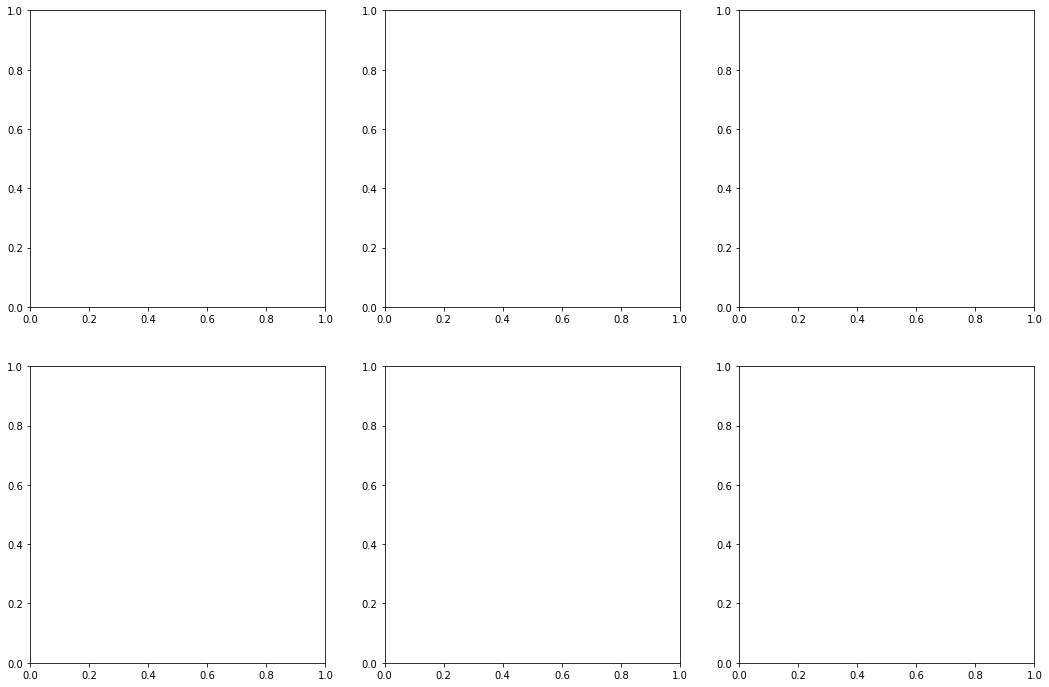

In [285]:
# no_classes = 3  # Number of classes
# num_folds = 5  # Number of folds
classes=4
# Create new subplots for the plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
ax11, ax12, ax13, ax14, ax15, ax16 = axes.flatten()

# Plot ROC curve for each class
for i in range(classes):
    fpr_keras, tpr_keras, _ = roc_curve(y_test[:, i], y_pred_keras[:, i])
    auc_keras = auc(fpr_keras, tpr_keras)
    ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
ax11.legend(loc='lower right')

# Plot PR curve for each class
for i in range(classes):
    precision, recall, _ = precision_recall_curve(y_test2[:, i], y_pred_keras[:, i])
    pr_auc = auc(recall, precision)
    ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
ax12.legend(loc='lower left')

# Calculate predictions
y_pred = model.predict(X_test2)
y_pred_cls = np.argmax(y_pred, axis=1)

# Calculate and print MCC metrics
conf_matrix = confusion_matrix(y_test, y_pred_cls)
class_report = classification_report(y_test, y_pred_cls)
mcc = matthews_corrcoef(y_test, y_pred_cls)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("MCC:", mcc)

# Plot Train Accuracy vs Val Accuracy for each fold
for fold in range(num_folds):
    ax13.plot(model_history[fold]['acc'], linestyle='--', lw=1, label='Train Accuracy Fold {}'.format(fold + 1))
    ax13.plot(model_history[fold]['val_acc'], label='Val Accuracy Fold {}'.format(fold + 1))

ax13.set(title='Train Accuracy vs Val Accuracy')
ax13.legend(prop={'size': 5})

# Plot Cross-Validation Accuracy for each fold
cross_val_accuracy = [history['val_acc'][-1] for history in model_history]
ax14.bar(range(1, num_folds + 1), cross_val_accuracy, color='c')
ax14.set(title='Cross-Validation Accuracy', xlabel='Fold', ylabel='Accuracy')

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax15)
ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')

# You can add other plots as needed in the remaining axes (ax16, ax17, etc.)

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig("../figures/CNN_Training_Val_Evaluation.jpg")
plt.show()

In [ ]:
df_filterd=pd.read_csv("filtered_SNP_training_data.csv")
df_filterd

In [702]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [854]:
def CNN(df):
#     df.to_csv("updated_merged_training_data.csv")
#     X=df.drop(columns=["category","BioSample","sra_accession","country","Isolation source"])
#     y=df["category"]
#     y
#     from sklearn.preprocessing import LabelEncoder
#     # Assuming you have a DataFrame named df with a "category" column
#     # Extract the "category" column as a pandas Series
#     y = df["category"]

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

#     # Fit and transform the label encoder on the extracted Series
    encoded_labels = pd.get_dummies(y)
#     X_train, X_test, y_train, y_test = train_test_split(X.values, encoded_labels, test_size=0.2, random_state=42,stratify=encoded_labels)

    inputs = X.values.reshape(X.values.shape[0],X.values.shape[1],1)
    inputs = inputs.astype('float32')
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    targets = to_categorical(y_encoded)
    inputs.shape,targets.shape

    X_test2 = test_data_ethiopia.values.reshape(test_data_ethiopia.values.shape[0],test_data_ethiopia.values.shape[1],1)
    X_test2 = X_test2.astype('float32')
    y_test2 = to_categorical(y_test)
    X_test2.shape,y_test2.shape

    ############################# Model training #####################
    batch_size = 8
    no_classes = 4
    no_epochs = 50
    verbosity = 1
    num_folds = 5

# Define the K-fold Cross Validator
    kfold = KFold(n_splits=num_folds, shuffle=True)
    # K-fold Cross Validation model evaluation
    fold_no = 1
    model_history=[]
    for train, test in kfold.split(inputs, targets):
        model = Sequential()
        model.add(Conv1D(filters=8, kernel_size=3,activation='relu', input_shape=(test_data_ethiopia.shape[1],1)))
        model.add(BatchNormalization())
        model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
        #model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=(2)))
        model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
        #model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=(2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(4,activation='softmax'))
        # Model compilation
        model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])
        # Generate a print
        print('--------------------------------')
        print(f'Training for fold {fold_no} ...')
        ## checkpoint for saving model
        filepath="Train_CNN_weights.best.hdf5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_f1_m', verbose=1, save_best_only=True,mode='max')
        callbacks_list = [checkpoint]
        # Fit data to model
        train_model = model.fit(inputs[train], targets[train],batch_size=batch_size,epochs=no_epochs,callbacks=callbacks_list,verbose=verbosity,validation_data=(inputs[test], targets[test]))
        model_history.append(train_model.history)
        # Increase fold number
        fold_no = fold_no + 1

    # Create new subplots for the plots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
    ax11, ax12, ax13, ax14, ax15, ax16 = axes.flatten()

#     # Plot ROC curve for each class
#     for i in range(classes):
#         fpr_keras, tpr_keras, _ = roc_curve(y_test2[:, i], y_ethiopia_one[:, i])
#         auc_keras = auc(fpr_keras, tpr_keras)
#         ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

#     ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
#     ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
#     ax11.legend(loc='lower right')

#     # Plot PR curve for each class
#     for i in range(classes):
#         precision, recall, _ = precision_recall_curve(y[:, i], y_pred_keras[:, i])
#         pr_auc = auc(recall, precision)
#         ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

#     ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
#     ax12.legend(loc='lower left')

    # Calculate predictions
    y_pred = model.predict(X_test2)
    y_pred_cls = np.argmax(y_pred, axis=1)

    # Calculate and print MCC metrics
    conf_matrix = confusion_matrix(y_ethiopia_hot, y_pred_cls)
    class_report = classification_report(y_test, y_pred_cls)
    mcc = matthews_corrcoef(y_ethiopia_hot, y_pred_cls)

    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("MCC:", mcc)

    # Plot Train Accuracy vs Val Accuracy for each fold
    for fold in range(num_folds):
        ax13.plot(model_history[fold]['acc'], linestyle='--', lw=1, label='Train Accuracy Fold {}'.format(fold + 1))
        ax13.plot(model_history[fold]['val_acc'], label='Val Accuracy Fold {}'.format(fold + 1))

    ax13.set(title='Train Accuracy vs Val Accuracy')
    ax13.legend(prop={'size': 5})

    # Plot Cross-Validation Accuracy for each fold
    cross_val_accuracy = [history['val_acc'][-1] for history in model_history]
    ax14.bar(range(1, num_folds + 1), cross_val_accuracy, color='c')
    ax14.set(title='Cross-Validation Accuracy', xlabel='Fold', ylabel='Accuracy')

    # Plot Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax15)
    ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')

    # You can add other plots as needed in the remaining axes (ax16, ax17, etc.)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.savefig("../figures/CNN_Training_Val_Evaluation_filtered.jpg")
    plt.show()

In [845]:
classes

4

In [846]:
y_ethiopia_one=label_encoder.fit_transform(y_ethiopia)
y_ethiopia_one

array([1, 0, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0,
       1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1,
       2, 2, 1])

In [847]:
del targets

NameError: name 'targets' is not defined

In [848]:
X

,2027584,305245,4027906,3906518,4552348,1804684,620867,4719149,341365,423595,...,3726424,2181910,4003673,2570482,3863338,3549846,297443,2099856,1852278,842668
0,4.0,4.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0
1,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,4.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,4.0,...,0.0,4.0,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
3,4.0,4.0,4.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,...,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,4.0,4.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,4.0,...,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0
710,4.0,4.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,4.0,...,0.0,4.0,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0


In [849]:
del inputs

NameError: name 'inputs' is not defined

In [850]:
type(y_pred_keras)

numpy.ndarray

In [851]:
y.value_counts()

category
poultry    225
swine      217
bovine     155
human      115
Name: count, dtype: int64

In [852]:
categories=["poultry","swine","bovine"]
df_new=df_filterd[df_filterd["category"].isin(categories)]

--------------------------------
Training for fold 1 ...
Epoch 1/50
66/72 [==========================>...] - ETA: 0s - loss: 0.3479 - acc: 0.8807 - f1_m: 0.8728 - precision_m: 0.9093 - recall_m: 0.8447
Epoch 1: val_f1_m improved from -inf to 0.85397, saving model to Train_CNN_weights.best.hdf5
72/72 [==============================] - 3s 11ms/step - loss: 0.3319 - acc: 0.8893 - f1_m: 0.8666 - precision_m: 0.9029 - recall_m: 0.8385 - val_loss: 0.4855 - val_acc: 0.9161 - val_f1_m: 0.8540 - val_precision_m: 1.0000 - val_recall_m: 0.7490
Epoch 2/50
23/72 [========>.....................] - ETA: 0s - loss: 0.1270 - acc: 0.9511 - f1_m: 0.9511 - precision_m: 0.9511 - recall_m: 0.9511

/home/jupyter-onyangob/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/72 [=========================>....] - ETA: 0s - loss: 0.1269 - acc: 0.9512 - f1_m: 0.9467 - precision_m: 0.9600 - recall_m: 0.9355
Epoch 2: val_f1_m improved from 0.85397 to 0.94530, saving model to Train_CNN_weights.best.hdf5
72/72 [==============================] - 0s 6ms/step - loss: 0.1346 - acc: 0.9455 - f1_m: 0.9426 - precision_m: 0.9573 - recall_m: 0.9306 - val_loss: 0.2636 - val_acc: 0.9650 - val_f1_m: 0.9453 - val_precision_m: 0.9633 - val_recall_m: 0.9306
Epoch 3/50
59/72 [=======================>......] - ETA: 0s - loss: 0.1424 - acc: 0.9470 - f1_m: 0.9443 - precision_m: 0.9708 - recall_m: 0.9216
Epoch 3: val_f1_m improved from 0.94530 to 0.96528, saving model to Train_CNN_weights.best.hdf5
72/72 [==============================] - 0s 5ms/step - loss: 0.1339 - acc: 0.9525 - f1_m: 0.9480 - precision_m: 0.9726 - recall_m: 0.9271 - val_loss: 0.1578 - val_acc: 0.9650 - val_f1_m: 0.9653 - val_precision_m: 0.9653 - val_recall_m: 0.9653
Epoch 4/50
68/72 [=========================

Epoch 21/50
60/72 [========================>.....] - ETA: 0s - loss: 0.0895 - acc: 0.9625 - f1_m: 0.9580 - precision_m: 0.9726 - recall_m: 0.9458
Epoch 21: val_f1_m did not improve from 0.96528
72/72 [==============================] - 0s 5ms/step - loss: 0.0965 - acc: 0.9613 - f1_m: 0.9578 - precision_m: 0.9720 - recall_m: 0.9462 - val_loss: 0.1279 - val_acc: 0.9650 - val_f1_m: 0.9653 - val_precision_m: 0.9653 - val_recall_m: 0.9653
Epoch 22/50
70/72 [============================>.] - ETA: 0s - loss: 0.0982 - acc: 0.9607 - f1_m: 0.9506 - precision_m: 0.9834 - recall_m: 0.9250
Epoch 22: val_f1_m did not improve from 0.96528
72/72 [==============================] - 0s 5ms/step - loss: 0.0979 - acc: 0.9613 - f1_m: 0.9510 - precision_m: 0.9839 - recall_m: 0.9253 - val_loss: 0.1308 - val_acc: 0.9650 - val_f1_m: 0.9263 - val_precision_m: 1.0000 - val_recall_m: 0.8681
Epoch 23/50
68/72 [===========================>..] - ETA: 0s - loss: 0.1007 - acc: 0.9596 - f1_m: 0.9589 - precision_m: 0.9811

Epoch 40/50
71/72 [============================>.] - ETA: 0s - loss: 0.0965 - acc: 0.9630 - f1_m: 0.9569 - precision_m: 0.9723 - recall_m: 0.9437
Epoch 40: val_f1_m did not improve from 0.96528
72/72 [==============================] - 0s 5ms/step - loss: 0.0986 - acc: 0.9613 - f1_m: 0.9436 - precision_m: 0.9588 - recall_m: 0.9306 - val_loss: 0.1302 - val_acc: 0.9650 - val_f1_m: 0.9616 - val_precision_m: 0.9653 - val_recall_m: 0.9583
Epoch 41/50
65/72 [==========================>...] - ETA: 0s - loss: 0.1060 - acc: 0.9577 - f1_m: 0.9464 - precision_m: 0.9783 - recall_m: 0.9192
Epoch 41: val_f1_m did not improve from 0.96528
72/72 [==============================] - 0s 5ms/step - loss: 0.1017 - acc: 0.9596 - f1_m: 0.9497 - precision_m: 0.9804 - recall_m: 0.9236 - val_loss: 0.1310 - val_acc: 0.9650 - val_f1_m: 0.9221 - val_precision_m: 1.0000 - val_recall_m: 0.8611
Epoch 42/50
63/72 [=========================>....] - ETA: 0s - loss: 0.0983 - acc: 0.9603 - f1_m: 0.9597 - precision_m: 0.9657

Epoch 27/50
68/72 [===========================>..] - ETA: 0s - loss: 0.1059 - acc: 0.9596 - f1_m: 0.9583 - precision_m: 0.9611 - recall_m: 0.9559
Epoch 27: val_f1_m did not improve from 0.96528
72/72 [==============================] - 0s 5ms/step - loss: 0.1013 - acc: 0.9613 - f1_m: 0.9606 - precision_m: 0.9633 - recall_m: 0.9583 - val_loss: 0.1001 - val_acc: 0.9650 - val_f1_m: 0.9653 - val_precision_m: 0.9653 - val_recall_m: 0.9653
Epoch 28/50
69/72 [===========================>..] - ETA: 0s - loss: 0.1038 - acc: 0.9601 - f1_m: 0.9592 - precision_m: 0.9601 - recall_m: 0.9583
Epoch 28: val_f1_m did not improve from 0.96528
72/72 [==============================] - 0s 5ms/step - loss: 0.1019 - acc: 0.9613 - f1_m: 0.9609 - precision_m: 0.9618 - recall_m: 0.9601 - val_loss: 0.0942 - val_acc: 0.9650 - val_f1_m: 0.9653 - val_precision_m: 0.9653 - val_recall_m: 0.9653
Epoch 29/50
61/72 [========================>.....] - ETA: 0s - loss: 0.1025 - acc: 0.9611 - f1_m: 0.9637 - precision_m: 0.9713

Epoch 46/50
59/72 [=======================>......] - ETA: 0s - loss: 0.1094 - acc: 0.9576 - f1_m: 0.9564 - precision_m: 0.9573 - recall_m: 0.9555
Epoch 46: val_f1_m did not improve from 0.96528
72/72 [==============================] - 0s 5ms/step - loss: 0.1015 - acc: 0.9613 - f1_m: 0.9608 - precision_m: 0.9616 - recall_m: 0.9601 - val_loss: 0.1841 - val_acc: 0.9510 - val_f1_m: 0.9504 - val_precision_m: 0.9504 - val_recall_m: 0.9504
Epoch 47/50
59/72 [=======================>......] - ETA: 0s - loss: 0.1106 - acc: 0.9576 - f1_m: 0.9586 - precision_m: 0.9597 - recall_m: 0.9576 
Epoch 47: val_f1_m did not improve from 0.96528
72/72 [==============================] - 0s 5ms/step - loss: 0.1032 - acc: 0.9613 - f1_m: 0.9626 - precision_m: 0.9635 - recall_m: 0.9618 - val_loss: 0.1836 - val_acc: 0.9510 - val_f1_m: 0.9504 - val_precision_m: 0.9504 - val_recall_m: 0.9504
Epoch 48/50
66/72 [==========================>...] - ETA: 0s - loss: 0.1047 - acc: 0.9602 - f1_m: 0.9591 - precision_m: 0.960

Epoch 33/50
66/72 [==========================>...] - ETA: 0s - loss: 0.0996 - acc: 0.9640 - f1_m: 0.9640 - precision_m: 0.9640 - recall_m: 0.9640
Epoch 33: val_f1_m did not improve from 0.95833
72/72 [==============================] - 0s 5ms/step - loss: 0.0991 - acc: 0.9632 - f1_m: 0.9635 - precision_m: 0.9635 - recall_m: 0.9635 - val_loss: 0.1107 - val_acc: 0.9577 - val_f1_m: 0.9583 - val_precision_m: 0.9583 - val_recall_m: 0.9583
Epoch 34/50
71/72 [============================>.] - ETA: 0s - loss: 0.1010 - acc: 0.9630 - f1_m: 0.9620 - precision_m: 0.9628 - recall_m: 0.9613
Epoch 34: val_f1_m did not improve from 0.95833
72/72 [==============================] - 0s 5ms/step - loss: 0.1007 - acc: 0.9632 - f1_m: 0.9625 - precision_m: 0.9633 - recall_m: 0.9618 - val_loss: 0.1098 - val_acc: 0.9577 - val_f1_m: 0.9583 - val_precision_m: 0.9583 - val_recall_m: 0.9583
Epoch 35/50
69/72 [===========================>..] - ETA: 0s - loss: 0.0928 - acc: 0.9656 - f1_m: 0.9656 - precision_m: 0.9656

Epoch 2/50
65/72 [==========================>...] - ETA: 0s - loss: 0.1449 - acc: 0.9500 - f1_m: 0.9457 - precision_m: 0.9709 - recall_m: 0.9269
Epoch 2: val_f1_m improved from 0.89845 to 0.92939, saving model to Train_CNN_weights.best.hdf5
72/72 [==============================] - 0s 6ms/step - loss: 0.1439 - acc: 0.9509 - f1_m: 0.9462 - precision_m: 0.9737 - recall_m: 0.9253 - val_loss: 0.2737 - val_acc: 0.9648 - val_f1_m: 0.9294 - val_precision_m: 0.9921 - val_recall_m: 0.8843
Epoch 3/50
65/72 [==========================>...] - ETA: 0s - loss: 0.1214 - acc: 0.9558 - f1_m: 0.9535 - precision_m: 0.9629 - recall_m: 0.9462
Epoch 3: val_f1_m improved from 0.92939 to 0.95820, saving model to Train_CNN_weights.best.hdf5
72/72 [==============================] - 0s 6ms/step - loss: 0.1286 - acc: 0.9509 - f1_m: 0.9502 - precision_m: 0.9596 - recall_m: 0.9427 - val_loss: 0.1437 - val_acc: 0.9789 - val_f1_m: 0.9582 - val_precision_m: 1.0000 - val_recall_m: 0.9282
Epoch 4/50
72/72 [==============

Epoch 39/50
64/72 [=========================>....] - ETA: 0s - loss: 0.0978 - acc: 0.9629 - f1_m: 0.9629 - precision_m: 0.9629 - recall_m: 0.9629
Epoch 39: val_f1_m did not improve from 0.97917
72/72 [==============================] - 0s 5ms/step - loss: 0.1082 - acc: 0.9579 - f1_m: 0.9531 - precision_m: 0.9531 - recall_m: 0.9531 - val_loss: 0.0639 - val_acc: 0.9789 - val_f1_m: 0.9792 - val_precision_m: 0.9792 - val_recall_m: 0.9792
Epoch 40/50
67/72 [==========================>...] - ETA: 0s - loss: 0.1069 - acc: 0.9571 - f1_m: 0.9534 - precision_m: 0.9771 - recall_m: 0.9347
Epoch 40: val_f1_m did not improve from 0.97917
72/72 [==============================] - 0s 5ms/step - loss: 0.1088 - acc: 0.9579 - f1_m: 0.9548 - precision_m: 0.9787 - recall_m: 0.9358 - val_loss: 0.0655 - val_acc: 0.9789 - val_f1_m: 0.9792 - val_precision_m: 0.9792 - val_recall_m: 0.9792
Epoch 41/50
68/72 [===========================>..] - ETA: 0s - loss: 0.1114 - acc: 0.9577 - f1_m: 0.9577 - precision_m: 0.9577

Epoch 26/50
60/72 [========================>.....] - ETA: 0s - loss: 0.1011 - acc: 0.9625 - f1_m: 0.9559 - precision_m: 0.9771 - recall_m: 0.9396
Epoch 26: val_f1_m did not improve from 0.94074
72/72 [==============================] - 0s 5ms/step - loss: 0.0993 - acc: 0.9632 - f1_m: 0.9581 - precision_m: 0.9757 - recall_m: 0.9444 - val_loss: 0.1511 - val_acc: 0.9366 - val_f1_m: 0.9407 - val_precision_m: 0.9444 - val_recall_m: 0.9375
Epoch 27/50
68/72 [===========================>..] - ETA: 0s - loss: 0.0990 - acc: 0.9651 - f1_m: 0.9610 - precision_m: 0.9651 - recall_m: 0.9577
Epoch 27: val_f1_m did not improve from 0.94074
72/72 [==============================] - 0s 5ms/step - loss: 0.0950 - acc: 0.9667 - f1_m: 0.9632 - precision_m: 0.9670 - recall_m: 0.9601 - val_loss: 0.1583 - val_acc: 0.9366 - val_f1_m: 0.9407 - val_precision_m: 0.9444 - val_recall_m: 0.9375
Epoch 28/50
68/72 [===========================>..] - ETA: 0s - loss: 0.0870 - acc: 0.9688 - f1_m: 0.9688 - precision_m: 0.9688

Epoch 45/50
70/72 [============================>.] - ETA: 0s - loss: 0.0926 - acc: 0.9661 - f1_m: 0.9661 - precision_m: 0.9661 - recall_m: 0.9661
Epoch 45: val_f1_m did not improve from 0.94074
72/72 [==============================] - 0s 5ms/step - loss: 0.0918 - acc: 0.9667 - f1_m: 0.9670 - precision_m: 0.9670 - recall_m: 0.9670 - val_loss: 0.1539 - val_acc: 0.9366 - val_f1_m: 0.9407 - val_precision_m: 0.9444 - val_recall_m: 0.9375
Epoch 46/50
71/72 [============================>.] - ETA: 0s - loss: 0.0928 - acc: 0.9665 - f1_m: 0.9665 - precision_m: 0.9665 - recall_m: 0.9665
Epoch 46: val_f1_m did not improve from 0.94074
72/72 [==============================] - 0s 5ms/step - loss: 0.0925 - acc: 0.9667 - f1_m: 0.9670 - precision_m: 0.9670 - recall_m: 0.9670 - val_loss: 0.1604 - val_acc: 0.9366 - val_f1_m: 0.9407 - val_precision_m: 0.9444 - val_recall_m: 0.9375
Epoch 47/50
71/72 [============================>.] - ETA: 0s - loss: 0.0935 - acc: 0.9665 - f1_m: 0.9665 - precision_m: 0.9665

ValueError: Found input variables with inconsistent numbers of samples: [143, 69]

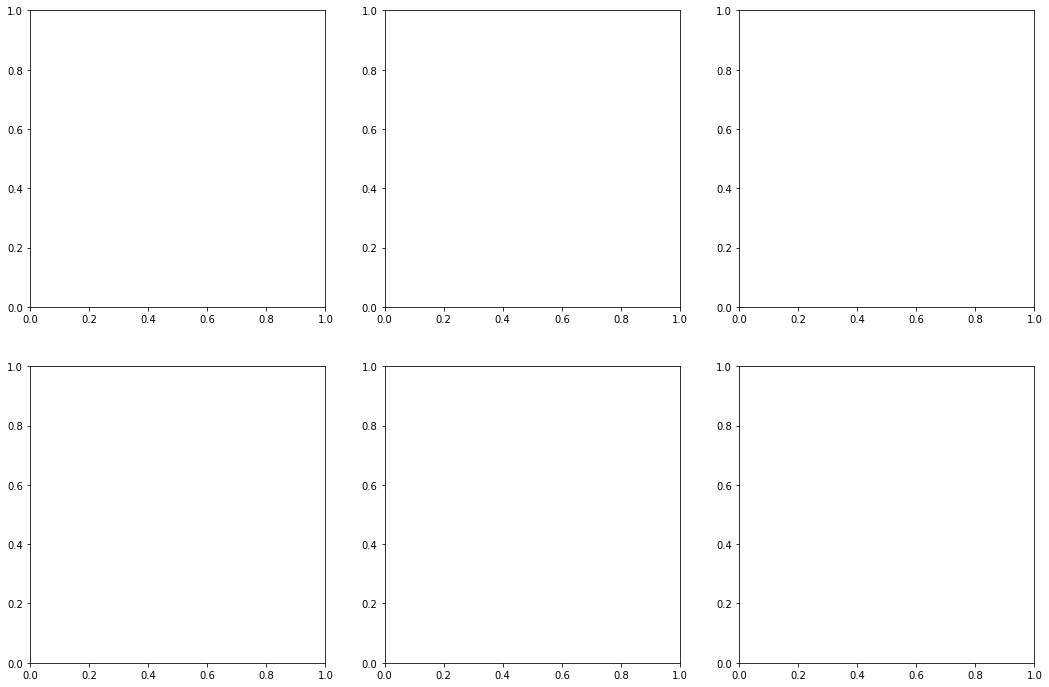

In [853]:
CNN(df)


In [776]:
inputs[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [4.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [4.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [694]:
# AUC and Logistic Regression
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [1086]:
X

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
1,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0
2,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
3,4.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
710,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0


In [1106]:
test_data_ethiopia=test_data_ethiopia.fillna(0)

# Logistic Regrssion

In [1107]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess your dataset (X and y)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Define hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Create a GridSearchCV object with 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(test_data_ethiopia)

# Evaluate the best model's performance
accuracy = accuracy_score(y_ethiopia, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred)
print("Classification Report:\n", report)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

      bovine       0.47      0.42      0.44        19
       human       0.00      0.00      0.00         0
     poultry       0.22      0.33      0.27        12
       swine       0.89      0.45      0.60        38

    accuracy                           0.42        69
   macro avg       0.40      0.30      0.33        69
weighted avg       0.66      0.42      0.50        69



/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill

In [1105]:
test_data_ethiopia

1

In [1097]:
test_data_ethiopia.isna().sum()

305245     0
2027584    0
3906518    0
4027906    0
4552348    0
          ..
1204491    0
2577505    0
1539534    0
4261227    0
2784060    0
Length: 300, dtype: int64

In [1028]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.896 (0.035)


# Random Forest Cross Fold Validation

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 24, 'min_samples_split': 8, 'n_estimators': 100, 'random_state': 142}
Best Accuracy: 0.90
Test Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

      bovine       0.20      0.05      0.08        19
       human       0.00      0.00      0.00         0
     poultry       0.44      0.67      0.53        12
       swine       0.78      0.76      0.77        38

    accuracy                           0.55        69
   macro avg       0.36      0.37      0.35        69
weighted avg       0.56      0.55      0.54        69

CPU times: user 3.45 s, sys: 200 ms, total: 3.65 s
Wall time: 2.1 s


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


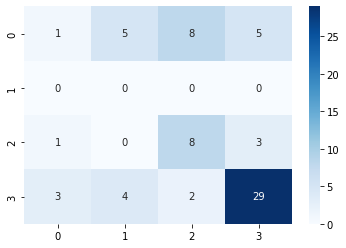

In [1140]:
%%time
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load and preprocess your dataset (X and y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define the parameter grid for the Random Forest
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None,2,  5, 10, 20,30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4,8],
#     'random_state': [142]
# }
# Define the parameter grid for the Random Forest
param_grid = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [8],
    'min_samples_leaf': [24],
    'random_state': [142]
}
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=142)

# Create a StratifiedKFold cross-validator with 10 folds (you can adjust the number of folds)
stratified_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=142)

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X_under, y_under)

# Print the best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy: {:.2f}".format(best_accuracy))

# Use the best parameters to create the final Random Forest model
best_model = RandomForestClassifier(**best_params)
# save best model
# Save the best model to a file
joblib.dump(best_model, 'best_random_forest_model.pkl')


# Train the model on the full training data
best_model.fit(X_under, y_under)

# Make predictions on your pre-existing test data (test_data_ethiopia)
y_pred = best_model.predict(test_data_ethiopia)

# Evaluate the model's performance on the test data
# Assuming you have the true labels for test data in y_ethiopia
accuracy = accuracy_score(y_ethiopia, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_ethiopia, y_pred)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')

# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred)
print("Classification Report:\n", report)

In [1125]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply Random Under-sampling to your dataset
X_under, y_under = rus.fit_resample(X, y)
X_under

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4516848,4755144,1749945,1684013,3715847,1204491,2577505,1539534,4261227,2784060
352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
2,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
248,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
76,4.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0


Classification Report:
               precision    recall  f1-score   support

      bovine       0.57      0.42      0.48        19
       human       0.00      1.00      0.00         0
     poultry       0.00      0.00      1.00        12
       swine       0.65      0.87      0.74        38

    accuracy                           0.59        69
   macro avg       0.30      0.57      0.56        69
weighted avg       0.51      0.59      0.72        69



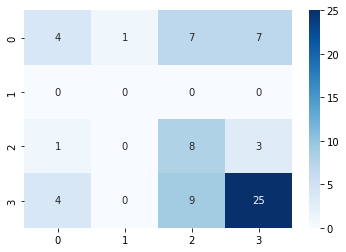

In [864]:
# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')


# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred,zero_division=1)
print("Classification Report:\n", report)

In [552]:
y.value_counts()

category
poultry    225
swine      217
bovine     155
human      115
Name: count, dtype: int64

In [549]:
# Plot the confusion matrix
# p(best_model, test_data_ethiopia, y_ethiopia, cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()
# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax15)
ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')
print(conf_matrix)

# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred,zero_division=1)
print("Classification Report:\n", report)

[[ 5  1  2 11]
 [ 0  0  0  0]
 [ 1  0  0 11]
 [ 4  0  0 34]]
Classification Report:
               precision    recall  f1-score   support

      bovine       0.50      0.26      0.34        19
       human       0.00      1.00      0.00         0
     poultry       0.00      0.00      1.00        12
       swine       0.61      0.89      0.72        38

    accuracy                           0.57        69
   macro avg       0.28      0.54      0.52        69
weighted avg       0.47      0.57      0.67        69



# Light GBM

In [1049]:
# LightGBM
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess your dataset (X and y)

# Create a LightGBM classifier
params = {
    'objective': 'multiclass',  # Change to 'multiclass' for multi-class classification
    'boosting_type': 'gbdt',
    'random_state': 142,
    'max_depth': 10,
 'num_leaves': 60 , # Adjust this value based on your dataset and problem
    'n_estimators': 100
}

model = lgb.LGBMClassifier(**params)

# Create a StratifiedKFold cross-validator with 5 folds (you can adjust the number of folds)
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)

# Perform stratified 10-fold cross-validation on the model
cv_scores = cross_val_score(model, X_under, y_under, cv=stratified_cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}".format(cv_scores.mean()))

# Train the model on the full training data
model.fit(X_under, y_under)

# Make predictions on your pre-existing test data (test_data_ethiopia)
y_pred = model.predict(test_data_ethiopia)

# Evaluate the model's performance on the test data
# Assuming you have the true labels for test data in y_test_ethiopia
accuracy = accuracy_score(y_ethiopia, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred)
print("Classification Report:\n", report)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 368, number of used features: 100
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [633]:
y_resampled=label_encoder.fit_transform(y_resampled)
y_resampled

ValueError: y should be a 1d array, got an array of shape (900, 4) instead.

# XgBoost

In [632]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load and preprocess your dataset (X and y)
# Replace this section with your dataset loading and preprocessing code
# You should have X and y as your feature and target data.

# Assuming y contains your string labels, let's encode them
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create an XGBoost classifier
params = {
    'objective': 'multi:softprob',  # Change to 'multi:softprob' for multi-class probabilities
    'random_state': 42,
    'max_depth': 5,
    'num_class': len(np.unique(y_encoded)),  # Number of unique classes in your dataset
    'n_estimators': 100,  # Adjust this value based on your dataset and problem
}

model = xgb.XGBClassifier(**params)

# Create a StratifiedKFold cross-validator with 5 folds (you can adjust the number of folds)
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best parameters and save the best model
grid_search = GridSearchCV(model, param_grid={}, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Train the best model on the full training data
best_model.fit(X_resampled, y_resampled)

# Save the best model to a file
best_model.save_model('best_xgboost_model.model')
# Replace test_data_ethiopia with your actual test data
y_pred_encoded = best_model.predict(test_data_ethiopia)

# Decode the predicted labels back to their original string labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the best model's performance on the test data
# Replace y_ethiopia with the true labels for your test data
accuracy = accuracy_score(true_labels_for_test_data, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
report = classification_report(true_labels_for_test_data, y_pred)
print("Classification Report:\n", report)


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [ ]:
accuracy = accuracy_score(y_ethiopia, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred)
print("Classification Report:\n", report)

In [537]:
# SVM 
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess your dataset (X and y)

# Define the parameter grid for the SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

# Create an SVM classifier
svm = SVC(random_state=142)

# Create a StratifiedKFold cross-validator with 10 folds (you can adjust the number of folds)
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy: {:.2f}".format(best_accuracy))

# Use the best parameters to create the final SVM model
best_svm = SVC(**best_params, random_state=42)

# Train the model on the full training data
best_svm.fit(X, y)

# Make predictions on your pre-existing test data (test_data_ethiopia)
y_pred = best_svm.predict(test_data_ethiopia)

# Evaluate the model's performance on the test data
# Assuming you have the true labels for test data in y_test_ethiopia
accuracy = accuracy_score(y_ethiopia, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred)
print("Classification Report:\n", report)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.96
Test Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

      bovine       0.38      0.16      0.22        19
     poultry       0.00      0.00      0.00        12
       swine       0.57      0.87      0.69        38

    accuracy                           0.52        69
   macro avg       0.31      0.34      0.30        69
weighted avg       0.42      0.52      0.44        69



In [598]:
! pip install XgBoost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 200.3 MB 54 kB/s              :31


In [520]:
# Make predictions on your pre-existing test data (test_data_ethiopia)
y_pred = best_model.predict(test_data_ug)
# Evaluate the best model's performance on the test data
# Assuming you have the true labels for test data in y_test_ethiopia
accuracy = accuracy_score(y_ug, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
# You can also print a classification report for more detailed metrics
report = classification_report(y_ug, y_pred)
print("Classification Report:\n", report)


Test Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

      bovine       0.33      0.50      0.40         2
     poultry       0.91      0.67      0.77        15
       swine       0.00      0.00      0.00         0

    accuracy                           0.65        17
   macro avg       0.41      0.39      0.39        17
weighted avg       0.84      0.65      0.73        17



/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [521]:
y_ug

0     poultry
1     poultry
2     poultry
3     poultry
4     poultry
5     poultry
6     poultry
7     poultry
8     poultry
9     poultry
10    poultry
11    poultry
12    poultry
13     bovine
14    poultry
15     bovine
16    poultry
Name: category, dtype: object

In [517]:
y_ethiopia.to_list()

['poultry',
 'bovine',
 'poultry',
 'bovine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'bovine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'bovine',
 'poultry',
 'bovine',
 'swine',
 'swine',
 'poultry',
 'bovine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'poultry',
 'swine',
 'poultry',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'bovine',
 'bovine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'poultry']

In [465]:
y_ethiopia

0     poultry
1      bovine
2     poultry
3      bovine
4      bovine
       ...   
64      swine
65    poultry
66      swine
67      swine
68    poultry
Name: category, Length: 69, dtype: object

In [454]:
y_ethiopia.to_list()

['poultry',
 'bovine',
 'poultry',
 'bovine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'bovine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'bovine',
 'poultry',
 'bovine',
 'swine',
 'swine',
 'poultry',
 'bovine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'poultry',
 'swine',
 'poultry',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'bovine',
 'bovine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'poultry']

In [390]:
y_ug

0     poultry
1     poultry
2     poultry
3     poultry
4     poultry
5     poultry
6     poultry
7     poultry
8     poultry
9     poultry
10    poultry
11    poultry
12    poultry
13     bovine
14    poultry
15     bovine
16    poultry
Name: category, dtype: object

In [181]:
# # plot ROC
# from itertools import cycle
# from sklearn.metrics import auc, roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import RocCurveDisplay

# # store the fpr, tpr, and roc_auc for all averaging strategies
# fpr, tpr, roc_auc = dict(), dict(), dict()
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# micro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="micro",
# )

# # macro averaging 
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# fpr_grid = np.linspace(0.0, 1.0, 1000)

# # Interpolate all ROC curves at these points
# mean_tpr = np.zeros_like(fpr_grid)

# for i in range(n_classes):
#     mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# # Average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = fpr_grid
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
# macro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="macro",
# )

# print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")
# fig, ax = plt.subplots(figsize=(6, 6))

# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
#     color="deeppink",
#     linestyle=":",
#     linewidth=4,
# )

# plt.plot(
#     fpr["macro"],
#     tpr["macro"],
#     label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
#     color="navy",
#     linestyle=":",
#     linewidth=4,
# )

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for class_id, color in zip(range(n_classes), colors):
#     RocCurveDisplay.from_predictions(
#         y_onehot_test[:, class_id],
#         y_score[:, class_id],
#         name=f"ROC curve for {target_names[class_id]}",
#         color=color,
#         ax=ax,
#         plot_chance_level=(class_id == 2),
#     )

# plt.axis("square")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
# plt.legend()
# plt.show()

In [180]:
y_onehot_test.shape
y_pred.shape

(75, 3)

# Stratified cross validation

Scanning